# Image binarisation
Use maximum weight cuts for image binarisation.

In [1]:
import networkx as nx

import numpy as np
from itertools import product

# GraphILP API: import networkx graphs and use maximum weight cut
import sys
sys.path.append("../..")

from graphilp.imports import networkx as nximp
from graphilp.cuts_flows import max_cut

In [2]:
%matplotlib inline

In [3]:
from matplotlib import image as mpimg 
from matplotlib import pyplot as plt

## Import image

In [4]:
image = mpimg.imread("images/example_hirschburg.png")

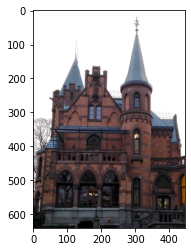

In [5]:
plt.imshow(image);

Convert to grayscale

In [6]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [7]:
gray = rgb2gray(image)

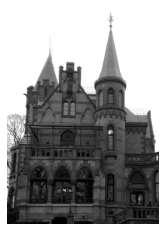

In [8]:
plt.imshow(gray, cmap='gray')
ax = plt.gca()
ax.set_axis_off()

## Set up pixel neighbourhood graph

In [9]:
G = nx.Graph()

In [10]:
G.add_nodes_from(product(range(gray.shape[0]), range(gray.shape[1])))

connect pixels in the image according to [4-neighbourhoods](https://en.wikipedia.org/wiki/Pixel_connectivity#4-connected)

In [11]:
edges = []
for node in G.nodes():
    if node[0] > 0:
        edges.append((node, (node[0]-1, node[1]), {'weight':abs(gray[node] - gray[(node[0]-1, node[1])])}))
    if node[0] < gray.shape[0]-1:
        edges.append((node, (node[0]+1, node[1]), {'weight':abs(gray[node] - gray[(node[0]+1, node[1])])}))
    if node[1] > 0:
        edges.append((node, (node[0], node[1]-1), {'weight':abs(gray[node] - gray[(node[0], node[1]-1)])}))
    if node[1] < gray.shape[1]-1:
        edges.append((node, (node[0], node[1]+1), {'weight':abs(gray[node] - gray[(node[0], node[1]+1)])}))

In [14]:
G.add_edges_from(edges)
print(len(G.edges()))

569794


## Set up and solve optimisation problem

Set up the maximum weight cut problem using GraphILP API:

In [ ]:
optG = nximp.read(G)

In [ ]:
m = max_cut.createModel(optG)

Find a maximum weight cut in the image graph:

In [ ]:
m.optimize()

In [ ]:
cut = max_cut.extractSolution(optG, m)

## Plot the result

In [ ]:
plt.scatter([c[1] for c in cut], [-c[0] for c in cut], s=0.1)
ax = plt.gca()
ax.set_aspect(gray.shape[0] / gray.shape[1])
ax.set_axis_off();